In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from proc_revisions.utils import *
from proc_revisions.plotting import *

In [2]:
od = '../../proc_revisions/'
config_file = f'{od}/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [3]:
ab = od+expand(config['lr']['talon']['fusion_fix']['ab'], species='human')[0]
filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='human')[0]
read_annot = od+expand(config['lr']['talon']['full_annot'], species='human')[0]
t_metadata = od+expand(config['ref']['cerberus']['new_gtf_t_info'], species='human')[0]
lib_meta = od+expand(config['lr']['meta'], species='human')[0]
swan_file = od+expand(config['lr']['swan']['sg'], species='human')[0]
cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='human', obs_col='sample')[0]
cerb_t_metadata = od+expand(config['lr']['cerberus']['gtf_t_info'], species='human')[0]
major_isos = od+expand(config['lr']['analysis']['major_isos'], species='human', obs_col='sample')[0]
pi_tpm_table = od+expand(config['lr']['mane']['pi_tpm']['triplet'], species='human', obs_col='sample')[0]
pp_summary = od+expand(config['lr']['protein_pred']['summary'], species='human')[0]

ref_t_metadata = od+expand(config['ref']['new_gtf_t_info'], species='human')[0]
ref_g_metadata = od+expand(config['ref']['new_gtf_g_info'], species='human')[0]

m_lib_meta = od+expand(config['lr']['meta'], species='mouse')[0]

ver = 'v40_cerberus'
min_tpm = 1
gene_subset = 'protein_coding'
obs_col = 'sample'
go_gene_subset = 'protein_coding'

# Figure 3

## Density plots for protein coding genes for GENCODE v40, observed, observed major

{'source': 'v40', 'biotype_category': ['protein_coding']}
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # genes detected: 564934
# genes >= 1 tpm: 276567
Applying gene type and novelty subset
Number of genes reported: 18736
{'source': 'obs_det', 'biotype_category': ['protein_coding']}
{'source': 'obs_major', 'biotype_category': ['protein_coding']}
figsize changed


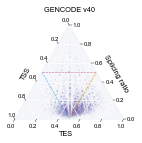

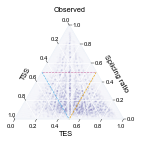

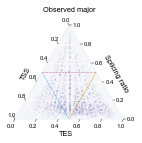

<Figure size 144x1440 with 0 Axes>

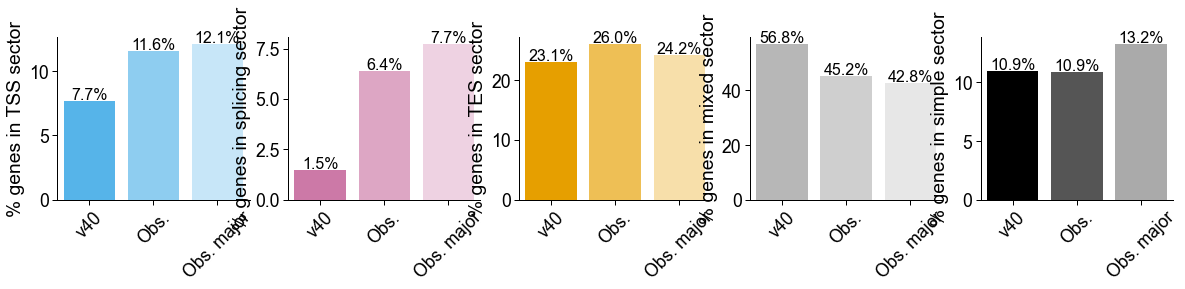

In [4]:
sources = ['v40', 'obs_det', 'obs_major']
titles = ['GENCODE v40', 'Observed', 'Observed major']
plot_density_simplices(cerberus_h5, 
                       ab,
                       min_tpm,
                       sources,
                       titles, 
                       gene_subset,
                       ver)

## Simplex plot for AKAP8L

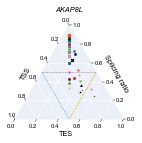

In [5]:
plot_obs_human_simplex_with_centroid(cerberus_h5,
                  'AKAP8L',
                  'figures/', 
                  source='sample_det',
                  gene_subset=gene_subset,
                  ver=ver)

## AKAP8L browser plots

Read in graph from ../../proc_revisions/data/human/lr/swan/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
Found 51 total samples


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/plotting.py:1894: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


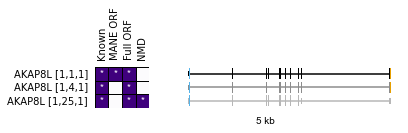

In [4]:
_ = plot_browser_isos_2(cerberus_h5,
                        swan_file,
                        filt_ab,
                        pp_summary,
                        major_isos,
                        'AKAP8L',
                        obs_col,
                        'h9',
                        'figures/akap8l_h9_browser_isos.pdf')

Read in graph from ../../proc_revisions/data/human/lr/swan/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
Found 51 total samples


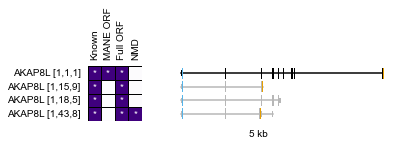

In [5]:
_ = plot_browser_isos_2(cerberus_h5,
                        swan_file,
                        filt_ab,
                        pp_summary,
                        major_isos,
                        'AKAP8L',
                        obs_col,
                        'h9_panc_progen',
                        'figures/akap8l_h9_panc_progen_browser_isos.pdf')

## Gene triplets with splicing ratio for AKAP8L

In [8]:
# triplets for H9 and H9-derived panc. progen.
ca = cerberus.read(cerberus_h5)
ca.triplets.loc[(ca.triplets.source=='sample_det')&\
                (ca.triplets['sample'].isin(['h9', 'h9_panc_progen']))&\
                (ca.triplets.gname=='AKAP8L')]

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm
343010,sample_det,ENSG00000011243,1.0,1.0,3.0,3.0,3.0,0.200000,0.200000,0.600000,splicing,AKAP8L,h9,14.475000
389567,sample_det,ENSG00000011243,1.0,4.0,4.0,4.0,1.6,0.151515,0.606061,0.242424,tes,AKAP8L,h9_panc_progen,8.423943


## Sample-level centroid vs. sample-level triplets distances

In [9]:
source = 'sample_det'
ca = cerberus.read(cerberus_h5)
ca = get_centroids(ca,
                   source=source,
                   gene_subset=gene_subset,
                   ver=ver)
df = compute_dists([ca,ca], 
                   sources=[source,f'{source}_centroid'],
                   gene_subsets=[gene_subset,gene_subset],
                   ver=[ver, ver])

n = len(df.loc[df.z_score > 3, 'gid'].unique().tolist())
print(f'{n} genes have sample-level triplet vs. sample-level centroid z-score >3')

> /Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py(3320)preproc_ca()
   3318         import pdb; pdb.set_trace()
   3319         # get triplets for source
-> 3320         df = ca.triplets.loc[ca.triplets.source == source].copy(deep=True)
   3321 
   3322         # if requested, remove triplets w/ only 1 isoform



ipdb>  c


> /Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py(3320)preproc_ca()
   3318         import pdb; pdb.set_trace()
   3319         # get triplets for source
-> 3320         df = ca.triplets.loc[ca.triplets.source == source].copy(deep=True)
   3321 
   3322         # if requested, remove triplets w/ only 1 isoform



ipdb>  c


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:1300: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


2741 genes have sample-level triplet vs. sample-level centroid z-score >3


In [10]:
df.loc[(df.gname=='AKAP8L')&(df.sample_sample_det=='h9_panc_progen')]

,source_sample_det,gid,n_tss_sample_det,n_tes_sample_det,n_ic_sample_det,n_iso_sample_det,splicing_ratio_sample_det,tss_ratio_sample_det,tes_ratio_sample_det,spl_ratio_sample_det,...,tss_ratio_sample_det_centroid,tes_ratio_sample_det_centroid,spl_ratio_sample_det_centroid,sector_sample_det_centroid,sample_sample_det_centroid,gene_tpm_sample_det_centroid,gid_stable_sample_det_centroid,biotype_sample_det_centroid,dist,z_score
8008,sample_det,ENSG00000011243,1.0,4.0,4.0,4.0,1.6,0.151515,0.606061,0.242424,...,0.160586,0.211392,0.628022,splicing,NaN,NaN,ENSG00000011243,protein_coding,0.306552,5.176824


## How many genes w/ > 1 det. isoform are in one of the corners of the simplex? 

In [11]:
ca = cerberus.read(cerberus_h5)
df = ca.triplets.loc[(ca.triplets.source=='obs_det')&\
                       (ca.triplets.n_iso>1)]

# limit to protein coding
gene_subset='protein_coding'
gene_df, _, _ = get_gtf_info(how='gene', ver=ver)
gene_df['gid_stable'] = cerberus.get_stable_gid(gene_df, 'gid')
df = df.merge(gene_df[['gid_stable', 'biotype_category']],
                  how='left', left_on='gid', right_on='gid_stable')
df = df.loc[df.biotype_category == gene_subset]
df.drop(['biotype_category', 'gid_stable'], axis=1, inplace=True)

In [12]:
df = df[['gid', 'sector']].groupby('sector').count().reset_index()
n = df.gid.sum()
n_num = df.loc[df.sector.isin(['splicing', 'tss', 'tes'])].gid.sum()
print(f'{(n_num/n)*100:.2f}% of genes w/ >1 isoform ({n_num}/{n}) are in tss, splicing, or tes sectors')


49.28% of genes w/ >1 isoform (7657/15537) are in tss, splicing, or tes sectors


# Figure S10

## Distances between observed gene triplets and sample-level centroid gene triplets

In [13]:
ca = cerberus.read(cerberus_h5)
ca = get_centroids(ca, 
                   source='sample_det',
                   gene_subset=gene_subset,
                   ver=ver)
df = compute_dists([ca, ca],
                   ['sample_det_centroid', 'obs_det'],
                   rm_1_isos=[False, True],
                   gene_subsets=[gene_subset, gene_subset],
                   ver=[ver, ver])

> /Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py(3320)preproc_ca()
   3318         import pdb; pdb.set_trace()
   3319         # get triplets for source
-> 3320         df = ca.triplets.loc[ca.triplets.source == source].copy(deep=True)
   3321 
   3322         # if requested, remove triplets w/ only 1 isoform



ipdb>  c


> /Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py(3320)preproc_ca()
   3318         import pdb; pdb.set_trace()
   3319         # get triplets for source
-> 3320         df = ca.triplets.loc[ca.triplets.source == source].copy(deep=True)
   3321 
   3322         # if requested, remove triplets w/ only 1 isoform



ipdb>  c


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:1300: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(js / 2.0)


In [14]:
n = len(df.index)
n_num = len(df.loc[df.z_score > 2].index)
print(f'{(n_num/n)*100:.2f}% genes ({n_num}/{n}) have z-score > 2 between obs. det and sample-level centroids')

3.46% genes (538/15537) have z-score > 2 between obs. det and sample-level centroids


In [15]:
n = len(df.loc[df.sector_obs_det=='tss'].index)
n_num = len(df.loc[(df.sector_obs_det=='tss')&(df.sector_sample_det_centroid!='tss')].index)
print(f'{(n_num/n)*100:.2f}% genes ({n_num}/{n}) in the obs_det TSS-high sector are not TSS-high for sample-level centroids')

79.23% genes (1598/2017) in the obs_det TSS-high sector are not TSS-high for sample-level centroids


In [16]:
# gene with the highest distance between obs_det and sample_det_centroid
df.sort_values(by='dist', ascending=False).head(1)[['gname', 'z_score']]

,gname,z_score
2607,CKM,5.31148


## ACTA1 labelled gene triplets

In [17]:
ca.triplets.loc[(ca.triplets.source.isin(['obs_det', 'sample_det_centroid']))&(ca.triplets.gname=='ACTA1')]

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm
8063,obs_det,ENSG00000143632,1.0,1.0,18.000000,18.000000,18.000000,0.050000,0.050000,0.900000,splicing,ACTA1,NaN,NaN
213,sample_det_centroid,ENSG00000143632,1.0,1.0,2.947368,2.947368,2.947368,0.279412,0.279412,0.441176,mixed,ACTA1,NaN,NaN


## # feats / transcripts / gene / sample

Calculating iso TPM values
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 191325
Found 51 total samples
Calculating iso TPM values
Subsetting for protein_coding genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 191325
Found 51 total samples
10.88% (1896/17433)of genes have just 1 iso
19.72% (110384/559824)of gene / sample combos have just 1 iso
iso ks test statistic: 0.34536125125521294, pval: 0.0
0.0

Calculating tss TPM values
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 73812
# tsss >= 1 tpm: 64913
Applying gene type and novelty subset
Number of tsss reported: 50292
Found 51 total samples
Calculating tss TPM values
Subsetting for protein_coding genes
Enforcing minimum TPM
Total # tsss detected: 73812
# tsss >= 1 tpm: 64913
Applying gene type and novelty subset
Number of tsss reported: 50292
Found 51 total samples
29.20% (5091/17437)of genes have just 1 tss
56.22% (317839/565387)of gene / sample combos have just 1 tss
tss ks test statistic: 0.2886282231105245, pval: 0.0
0.0

Calculating ic TPM values
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # ics detected: 145392
# ics >= 1 tpm: 131409
Applying gene type and novelty subset
Number of ics reported: 113956
Found 51 total samples
Calculating ic TPM values
Subsetting for protein_coding genes
Enforcing minimum TPM
Total # ics detected: 145392
# ics >= 1 tpm: 131409
Applying gene type and novelty subset
Number of ics reported: 113956
Found 51 total samples
15.73% (2742/17433)of genes have just 1 ic
28.64% (161219/562944)of gene / sample combos have just 1 ic
ic ks test statistic: 0.28033185835524727, pval: 0.0
0.0

Calculating tes TPM values
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2087: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 87189
# tess >= 1 tpm: 76035
Applying gene type and novelty subset
Number of tess reported: 59903
Found 51 total samples
Calculating tes TPM values
Subsetting for protein_coding genes
Enforcing minimum TPM
Total # tess detected: 87189
# tess >= 1 tpm: 76035
Applying gene type and novelty subset
Number of tess reported: 59903
Found 51 total samples
24.07% (4196/17435)of genes have just 1 tes
45.82% (258571/564294)of gene / sample combos have just 1 tes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/plotting.py:2761: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(3,4))


tes ks test statistic: 0.28380463480978735, pval: 0.0
0.0



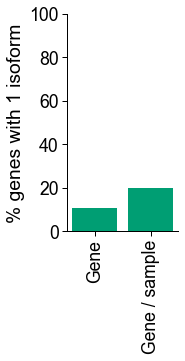

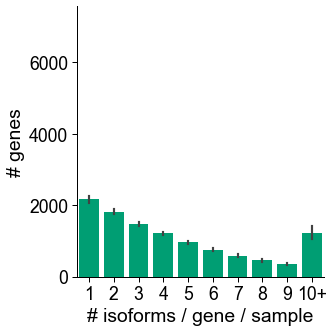

<Figure size 216x288 with 0 Axes>

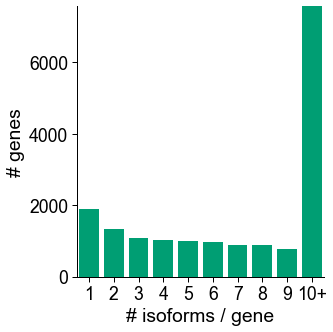

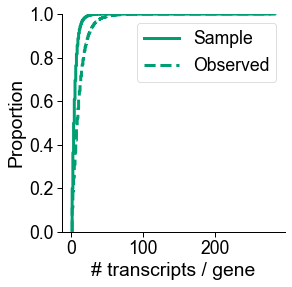

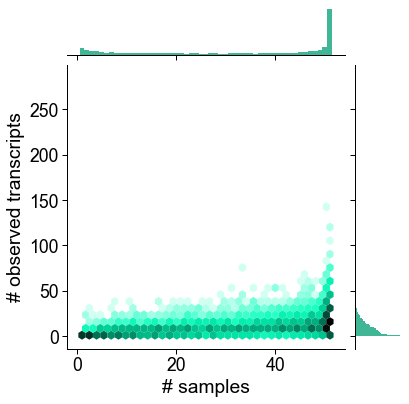

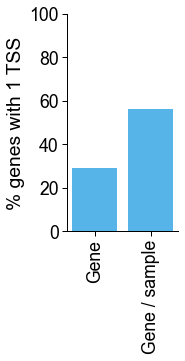

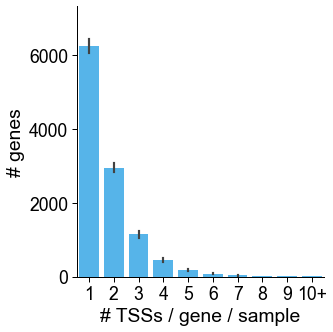

<Figure size 216x288 with 0 Axes>

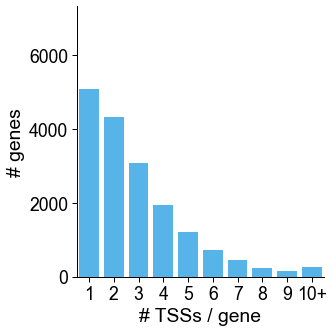

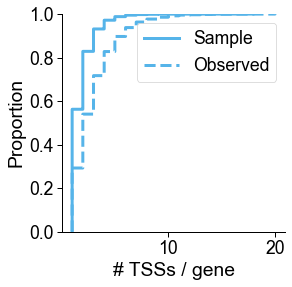

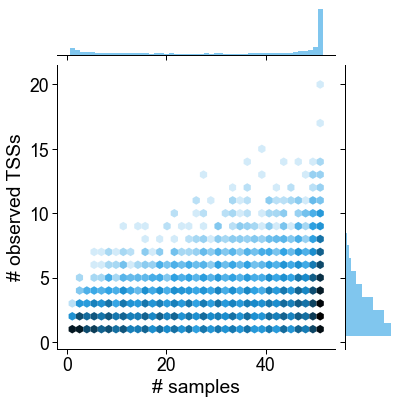

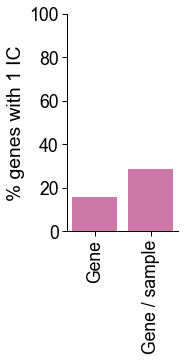

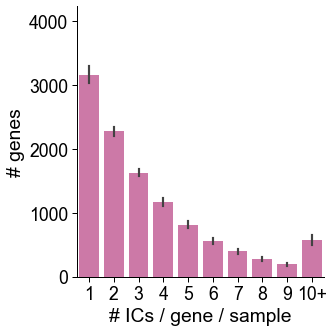

<Figure size 216x288 with 0 Axes>

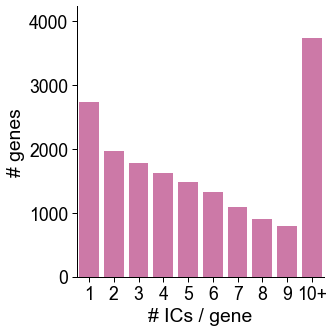

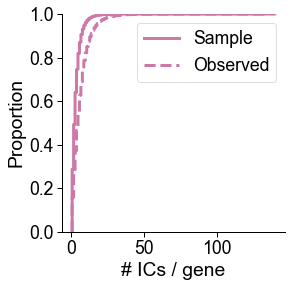

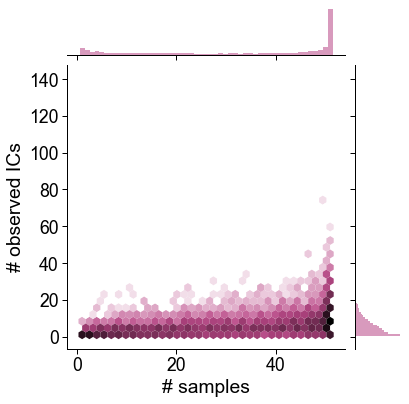

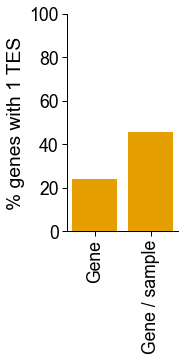

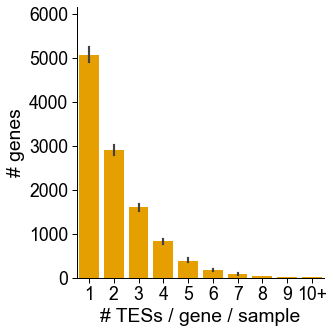

<Figure size 216x288 with 0 Axes>

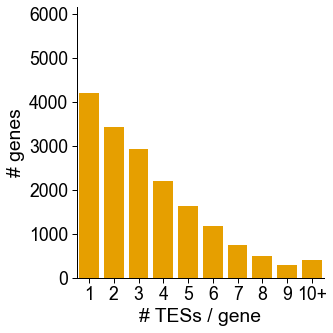

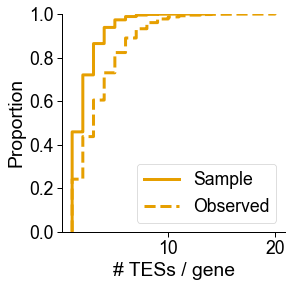

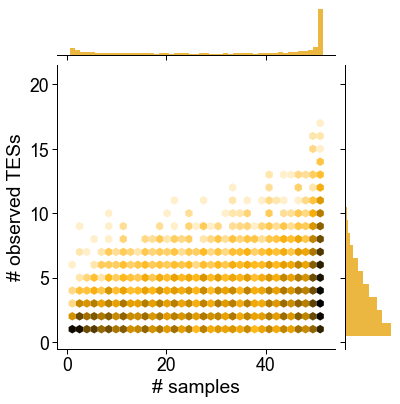

In [19]:
obs_col = 'sample'
min_tpm = 1
gene_subset = 'protein_coding'
fig_dir = 'figures/'

feat_sample = pd.DataFrame()
df = pd.DataFrame()
for feat in ['iso', 'tss', 'ic', 'tes']:

    # these won't give the exact same values / gene as the triplets because we're looking
    # at the expression of individual features. But to be consistent with what's done 
    # to generate the plots earlier in the paper this is how we should do it
    g_counts = get_counts_per_gene(filt_ab, obs_col, feat, min_tpm, gene_subset)
    gs_counts = get_counts_per_sample_per_gene(filt_ab, obs_col, feat, min_tpm, gene_subset)
    
    g_counts['source'] = 'Observed'
    g_counts['feat'] = feat
    gs_counts['source'] = 'Sample'
    gs_counts['feat'] = feat
    
    # what % of genes only have 1 triplet feat?
    n_num = len(g_counts.loc[g_counts.counts==1].index)
    n = len(g_counts.index)
    p_g = perc(n_num, n)
    print(f'{p_g:.2f}% ({n_num}/{n})of genes have just 1 {feat}')
    
    # what % of gene / sample combos only have 1 triplet feat?
    n_num = len(gs_counts.loc[gs_counts.counts==1].index)
    n = len(gs_counts.index)
    p_gs = perc(n_num, n)
    print(f'{perc(n_num,n):.2f}% ({n_num}/{n})of gene / sample combos have just 1 {feat}')
    temp1 = pd.DataFrame()
    temp1['combo'] = ['Gene', 'Gene / sample'] 
    temp1['perc'] = [p_g, p_gs]
    temp1['feat'] = feat
    plot_perc_one_feat(temp1, feat, opref=fig_dir)
        
    temp = pd.concat([g_counts, gs_counts], axis=0)    
    
    # # remove genes that only have 1 isoform overall
    # gids = ca.triplets.loc[(ca.triplets.source=='obs_det')&(ca.triplets.n_iso>1), 'gid'].unique().tolist()
    # print(len(temp.index))
    # temp = temp.loc[temp.gid.isin(gids)]
    # print(len(temp.index))
    
    # make plots
    
    plot_feats_per_sample_gene(temp, feat, obs_col, fig_dir)
    plot_feats_per_sample_gene_ecdf(temp, feat, obs_col, fig_dir)
    
    # test for differences
    obs = np.array(temp.loc[temp.source=='Observed', 'counts'].tolist())
    samp = np.array(temp.loc[temp.source=='Sample', 'counts'].tolist())
    
    s, pval = stats.kstest(obs, samp, alternative='two-sided')
    print(f'{feat} ks test statistic: {s}, pval: {pval}')
    print(pval)
    print()
    
    # make an aggregate dataframe across the feats for n_feats vs. n_samples
    # feat_sample = pd.concat([feat_sample, get_n_samples_vs_n_feats(temp)], axis=0)
    plot_n_samples_vs_n_feats(temp, feat, opref=fig_dir)
    
    df = pd.concat([df, temp], axis=0)   

## ACTA1 # transcripts expressed in each sample

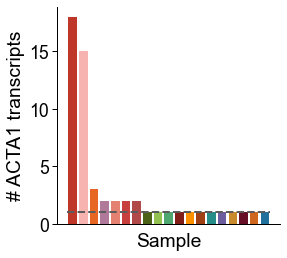

In [20]:
source = 'sample_det'
ca = cerberus.read(cerberus_h5)
ca = get_centroids(ca,
                   source=source,
                   gene_subset=gene_subset,
                   ver=ver)

plot_n_transcripts_per_sample(ca,
                              'ACTA1',
                              'sample_det',
                              'figures/acta1_transcripts_per_sample.pdf')

In [21]:
ca.triplets.loc[(ca.triplets.gname=='ACTA1')&\
                (ca.triplets['sample'].isin(['heart', 'muscle']))&\
                (ca.triplets.source=='sample_det')]

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm
123682,sample_det,ENSG00000143632,1.0,1.0,18.0,18.0,18.0,0.050000,0.050000,0.900000,splicing,ACTA1,heart,5266.510254
527455,sample_det,ENSG00000143632,1.0,1.0,15.0,15.0,15.0,0.058824,0.058824,0.882353,splicing,ACTA1,muscle,12631.143555


In [22]:
ca.triplets.loc[(ca.triplets.gname=='ACTA1')&\
                (ca.triplets.source.isin(['sample_det_centroid', 'obs_det']))]

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm
8063,obs_det,ENSG00000143632,1.0,1.0,18.000000,18.000000,18.000000,0.050000,0.050000,0.900000,splicing,ACTA1,NaN,NaN
213,sample_det_centroid,ENSG00000143632,1.0,1.0,2.947368,2.947368,2.947368,0.279412,0.279412,0.441176,mixed,ACTA1,NaN,NaN


## ACTA1 simplex

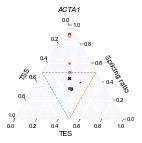

In [23]:
gene = 'ACTA1'
c_dict, order = get_biosample_colors()
c_dict[np.nan] = 'k'
mmap = {'v40': '*', 'v29': 'x', 'obs_det': '^', 'cerberus': '2', 'sample_det_centroid': 'x'} 
subset = {'source': ['v40', 'obs_det', 'sample_det', 'sample_det_centroid']}
fname='figures/simplex_{}_det.pdf'.format(gene.lower())
df = ca.plot_simplex(top='splicing_ratio', 
                     gene=gene,
                     hue='sample',
                     cmap=c_dict,
                     density=True,
                     density_scale=50,
                     density_cmap='Purples',
                     size='gene_tpm', 
                     log_size=True,
                     sectors=True,
                     marker_style='source',
                     mmap=mmap,
                     legend=False,
                     jitter=True,
                     subset=subset,
                     size_scale=0.2,
                     fname=fname) 

## ACTA1 transcripts

Read in graph from ../../proc_revisions/data/human/lr/swan/swan_graph.p
Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 209819
Found 51 total samples


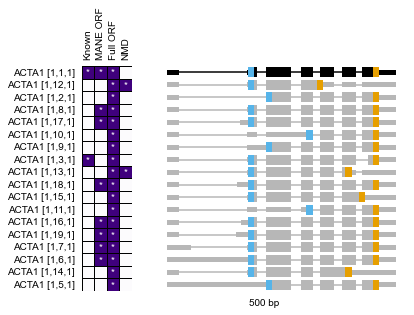

In [6]:
_ = plot_browser_isos_2(cerberus_h5,
                        swan_file,
                        filt_ab,
                        pp_summary,
                        major_isos,
                        'ACTA1',
                        obs_col,
                        'heart',
                        'figures/acta1_heart_browser_isos.pdf')